In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1

from pytamp.action.pick import PickAction
from pytamp.action.rearrangement import RearrangementAction


from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement


def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=21, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-59b89790-b253-4476-984e-7d8798755b93.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.6068322  -0.48750704  0.84779998]),
                           Object(name=can0, pos=[ 0.28703044 -0.43226677  0.83517396]),
                           Object(name=can1, pos=[0.80422845 0.03503504 0.85059666]),
                           Object(name=milk0, pos=[0.86023026 0.45563961 0.83236691]),
                           Object(name=cereal0, pos=[

In [2]:
rearrangement1.scene_mngr.heuristic = False
pick = PickAction(rearrangement1.scene_mngr, n_contacts=20, n_directions=14)


In [3]:
pick.scene_mngr.render

In [4]:
actions = list(pick.get_possible_actions_level_1())

get grasp :  table
get grasp :  ben_cube0
get grasp :  can0
get grasp :  can1
get grasp :  milk0
get grasp :  cereal0


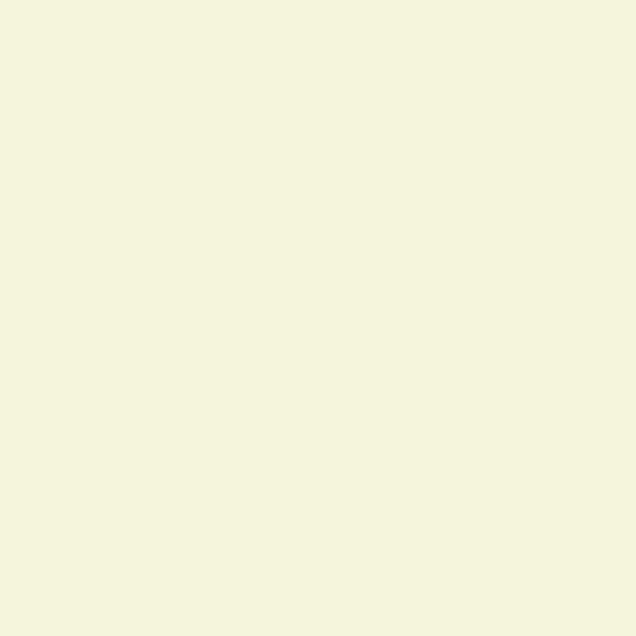

In [5]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
for pick_actions in actions:
    for all_grasp_pose in pick_actions[pick.info.GRASP_POSES]:
        pick.scene_mngr.set_gripper_pose(all_grasp_pose[pick.move_data.MOVE_grasp])
        pick.scene_mngr.render_axis(ax, all_grasp_pose[pick.move_data.MOVE_grasp])
pick.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
pick.show()

In [6]:
pick_all_joint_path = []
pick_all_objects = []
pick_all_object_poses = []

pick_path = []
pick_objects = []
pick_object_poses = []


success_joint_path = False
for pick_action in actions:
    for idx, pick_scene in enumerate(
        pick.get_possible_transitions(pick.scene_mngr.scene, action=pick_action)
    ):
        pick_joint_path = pick.get_possible_joint_path_level_2(
            scene=pick_scene, grasp_poses=pick_scene.grasp_poses
        )
        if pick_joint_path:
            success_joint_path = True
            pick_path += pick_joint_path
            pick_objects.append(pick.scene_mngr.attached_obj_name)
            pick_object_poses.append(pick.scene_mngr.scene.robot.gripper.pick_obj_pose)
        if success_joint_path:
            break
    if success_joint_path:
        break


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


solve the problem using LM2!! 
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0101 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 2.218
WorkingTime[run]: 3.1034 sec

WorkingTime[run]: 0.0912 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1282 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30


Cost is 2.181
WorkingTime[run]: 3.3270 sec



In [9]:
pick_all_joint_path = []
pick_all_objects = []
pick_all_object_poses = []

pick_all_joint_path.append(pick_path)
pick_all_objects.append(pick_objects)
pick_all_object_poses.append(pick_object_poses)

In [10]:
pick_all_joint_path

[[OrderedDict([('pre_grasp',
                [array([-0.0578549 ,  0.06986658,  1.52135155,  0.02120696,  1.59664974,
                         0.04937945]),
                 array([-0.11570981,  0.13973316,  1.47190678,  0.04241393,  1.62250316,
                         0.0987589 ]),
                 array([-0.17356471,  0.20959974,  1.42246201,  0.06362089,  1.64835658,
                         0.14813836]),
                 array([-0.23141961,  0.27946631,  1.37301723,  0.08482786,  1.67421   ,
                         0.19751781]),
                 array([-0.28927452,  0.34933289,  1.32357246,  0.10603482,  1.70006342,
                         0.24689726]),
                 array([-0.34712942,  0.41919947,  1.27412769,  0.12724178,  1.72591683,
                         0.29627671]),
                 array([-0.40498432,  0.48906605,  1.22468291,  0.14844875,  1.75177025,
                         0.34565617]),
                 array([-0.46283923,  0.55893263,  1.17523814,  0.16965571,

In [9]:
from pykin.utils.kin_utils import apply_robot_to_scene

pick.scene_mngr.render.render_objects(pick.scene_mngr.scene.objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

In [10]:
pick.scene_mngr.render

In [10]:
img = pick.scene_mngr.render.get_scene_img()

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img)

NameError: name 'img' is not defined

0 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1
Save finished..


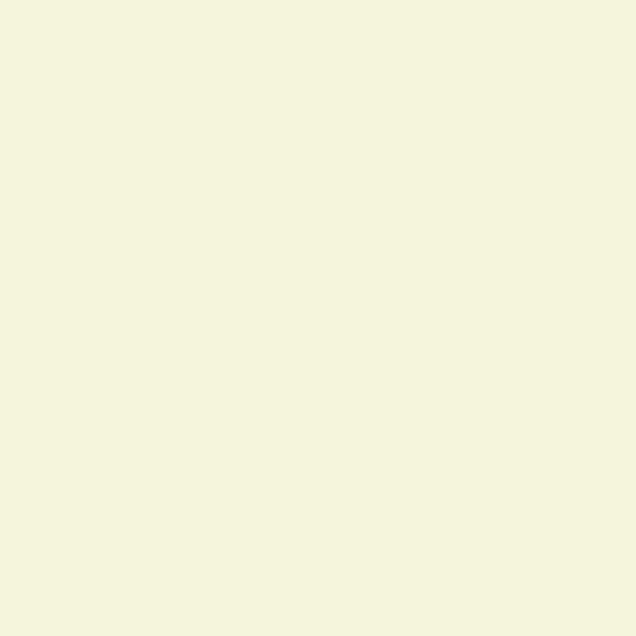

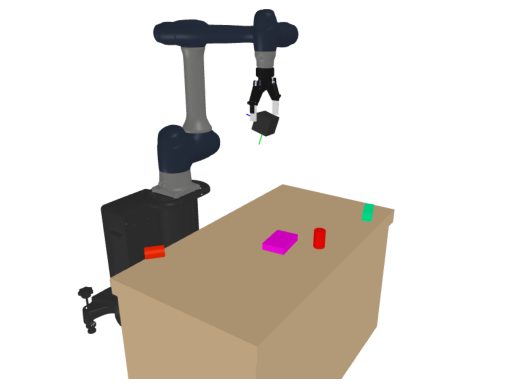

In [12]:
pick.scene_mngr.render.render_objects(pick.scene_mngr.scene.objs)

pick.simulate_path(
    pick_all_joint_path,
    pick_all_objects,
    pick_all_object_poses,
    is_save=True,
    video_name="Pick_in_rearr_scene",
    gif=False,
)

In [10]:
for i, o in pick.scene_mngr.scene.objs.items():
    print(i,o)

table Object(name=table, pos=[ 0.9   -0.6    0.043])
ben_cube0 Object(name=ben_cube0, pos=[ 0.51224777 -0.30205152  0.84779998])
can0 Object(name=can0, pos=[0.52298875 0.45872414 0.85059666])
can1 Object(name=can1, pos=[0.57888044 0.07873193 0.83516771])
milk0 Object(name=milk0, pos=[ 0.82293572 -0.52496244  0.83236691])
cereal0 Object(name=cereal0, pos=[ 0.4360076  -0.25732616  0.86029978])


In [ ]:
c = 3
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

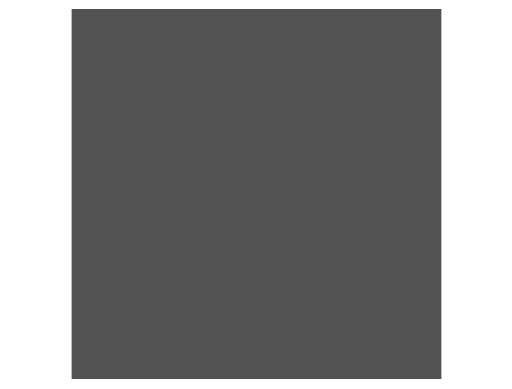

In [23]:
import trimesh
import pyglet
import numpy as np
from PIL import Image
import io

import matplotlib.pyplot as plt
from matplotlib import animation

# trimesh 객체 생성
mesh = trimesh.creation.box()
scene = trimesh.Scene(mesh)

# 프레임 설정
num_frames = 60  # 프레임 수
rotations = np.linspace(0, 2 * np.pi, num_frames)  # 회전 각도 배열

# 이미지 저장 및 프레임 추가
images = []
for rotation in rotations:
    # 회전 변환
    transformed_scene = scene.copy()
    transformed_scene.apply_transform(trimesh.transformations.rotation_matrix(rotation, [0, 1, 0]))

    # 이미지 저장
    data = transformed_scene.save_image(resolution=[800, 600])
    # byte image를 np.array로 변경 
    image = np.array(Image.open(io.BytesIO(data))) 
    
    images.append(image)

# 동영상 만들기
fig = plt.figure()
ax = plt.gca()
im = ax.imshow(images[0], cmap='gray')
plt.axis('off')

# 각 프레임 업데이트 함수
def update_frame(frame):
    im.set_array(images[frame])
    return im,

# 애니메이션 생성
ani = animation.FuncAnimation(fig, update_frame, frames=num_frames, interval=50, blit=True)

# 동영상 저장
writer = animation.FFMpegWriter(fps=30)
output_filename = 'output.mp4'
ani.save(output_filename, writer=writer)

In [20]:
im.set_array(images[0]),

(None,)

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=B_box, pos=[ 0.6        -0.2         0.85829998]),
                           Object(name=C_box, pos=[0.6        0.2        0.85829998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************

get grasp :  table
get grasp :  A_box
get grasp :  B_box
get grasp :  C_box
get grasp :  tray_red
*********************** Logical States ***********************
Ordere

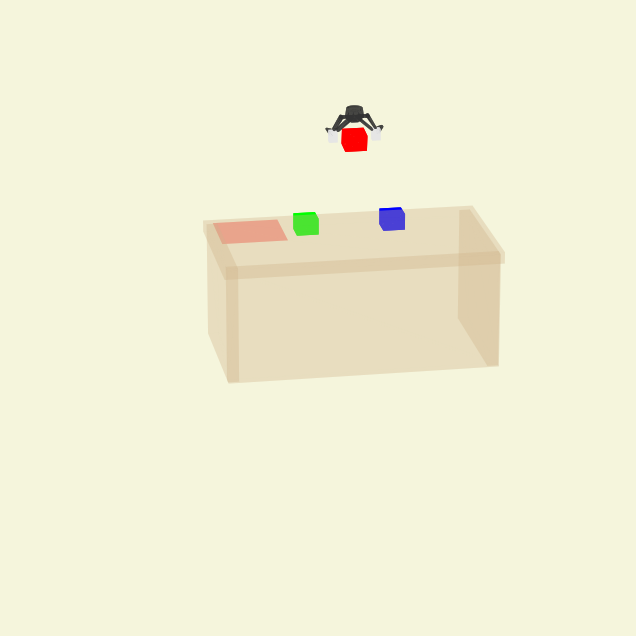

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=tray_red, pos=[ 0.7   -0.6    0.805])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red',
              {'static': True,
               'support': [Object(name=A_box, pos=[ 0.55019333 -0.45036107  0.856     ])]}),
             ('table',
              {'static': True,
               'support': [Object(name=B_box, pos=[ 0.6        -0.2         0.85829998]),
                           Object(name=C_box, pos=[0.6        0.2        0.85829998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************



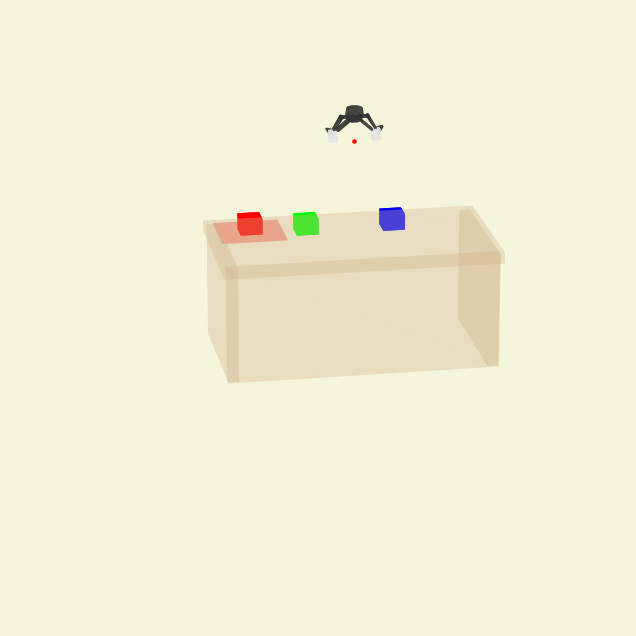

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box', {'held': True}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=C_box, pos=[0.6        0.2        0.85829998])]}),
             ('robotiq140_gripper',
              {'holding': Object(name=B_box, pos=[0.5165861  0.03890106 1.34135201])})])
***************************************************************



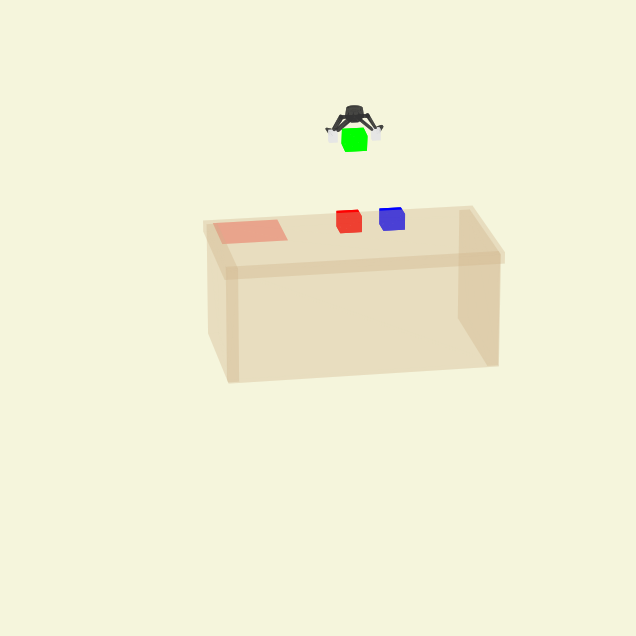

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=B_box, pos=[0.59876267 0.00132557 0.95829998])]}),
             ('B_box',
              {'on': Object(name=A_box, pos=[0.6        0.         0.85829998])}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=C_box, pos=[0.6        0.2        0.85829998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************



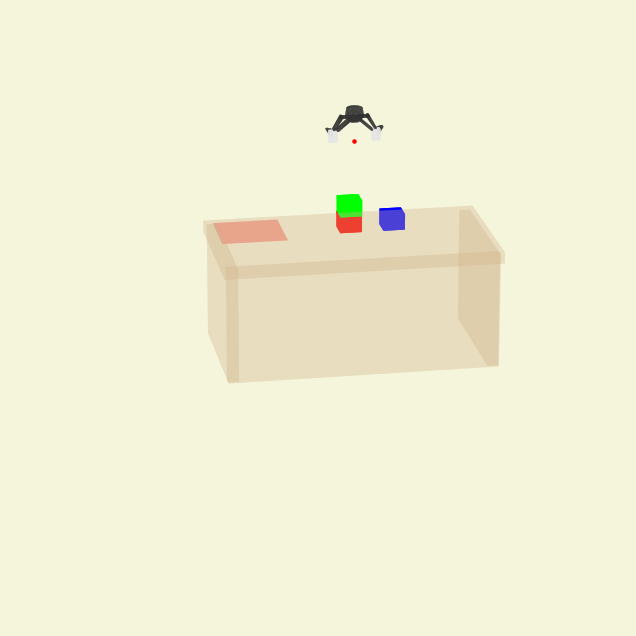

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box', {'held': True}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=C_box, pos=[0.6        0.2        0.85829998])]}),
             ('robotiq140_gripper',
              {'holding': Object(name=B_box, pos=[0.5165861  0.03890106 1.34135201])})])
***************************************************************



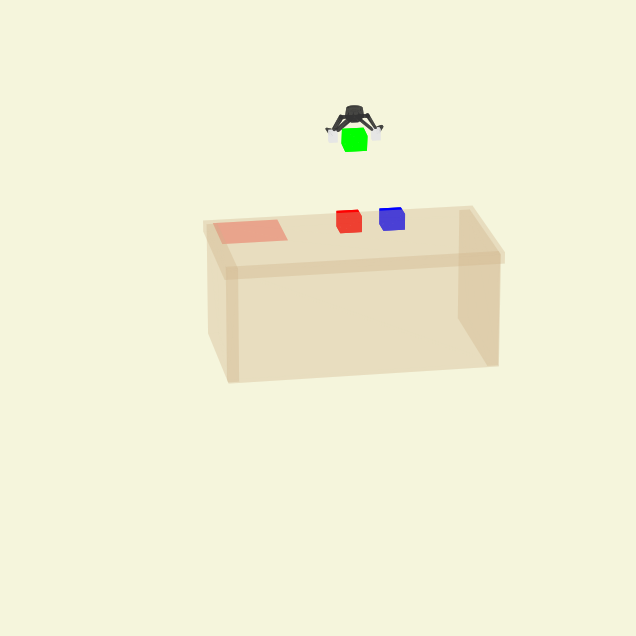

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=tray_red, pos=[ 0.7   -0.6    0.805])}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red',
              {'static': True,
               'support': [Object(name=B_box, pos=[ 0.55138809 -0.45031399  0.856     ])]}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=C_box, pos=[0.6        0.2        0.85829998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************



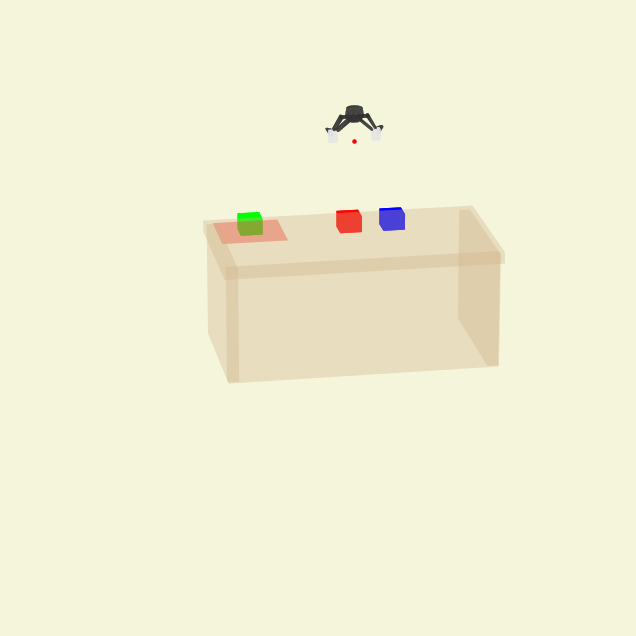

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box', {'held': True}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])]}),
             ('robotiq140_gripper',
              {'holding': Object(name=C_box, pos=[0.5165861  0.03890106 1.34135201])})])
***************************************************************



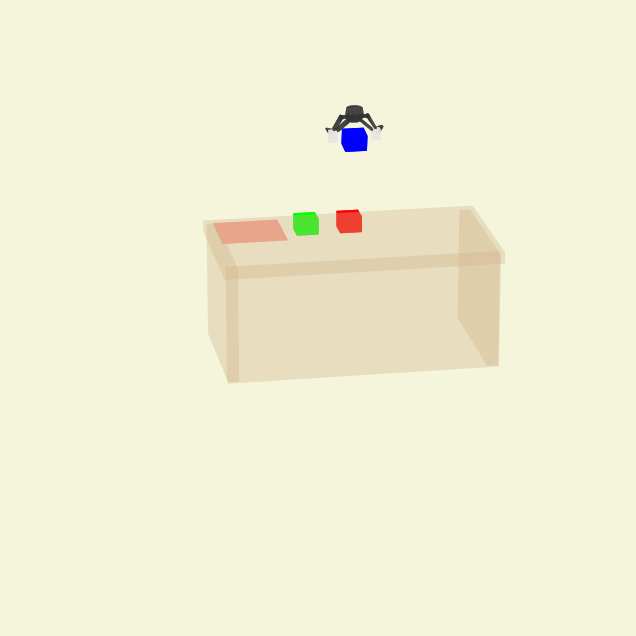

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=C_box, pos=[0.60191576 0.00129541 0.95829998])]}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box',
              {'on': Object(name=A_box, pos=[0.6        0.         0.85829998])}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************



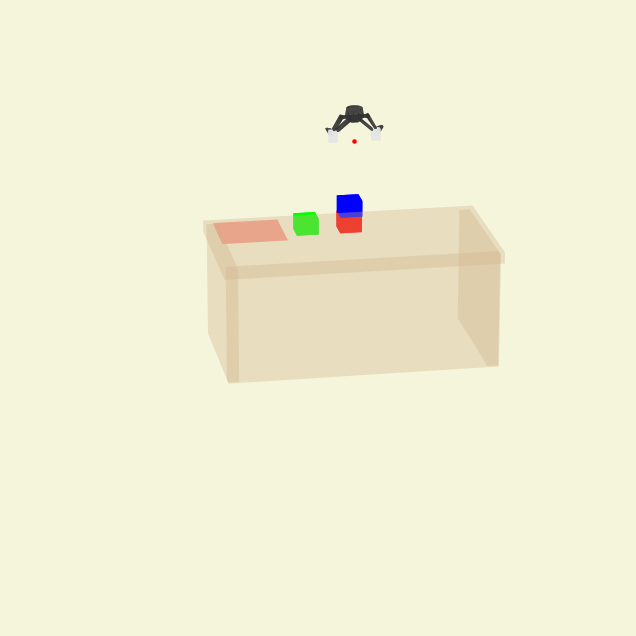

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box', {'held': True}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])]}),
             ('robotiq140_gripper',
              {'holding': Object(name=C_box, pos=[0.5165861  0.03890106 1.34135201])})])
***************************************************************



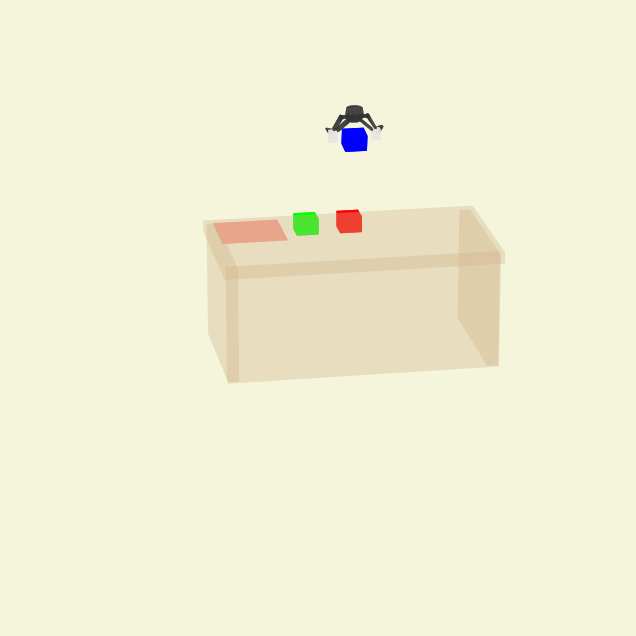

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=C_box, pos=[ 0.59906309 -0.19866281  0.95829998])]}),
             ('C_box',
              {'on': Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************



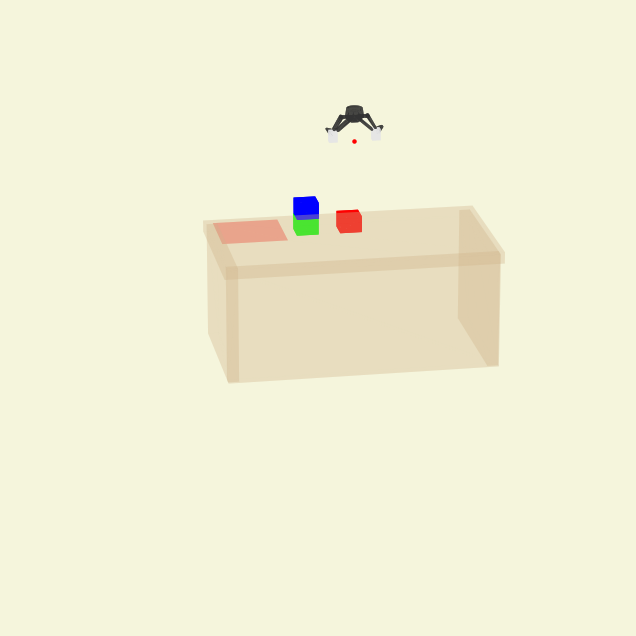

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box', {'held': True}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])]}),
             ('robotiq140_gripper',
              {'holding': Object(name=C_box, pos=[0.5165861  0.03890106 1.34135201])})])
***************************************************************



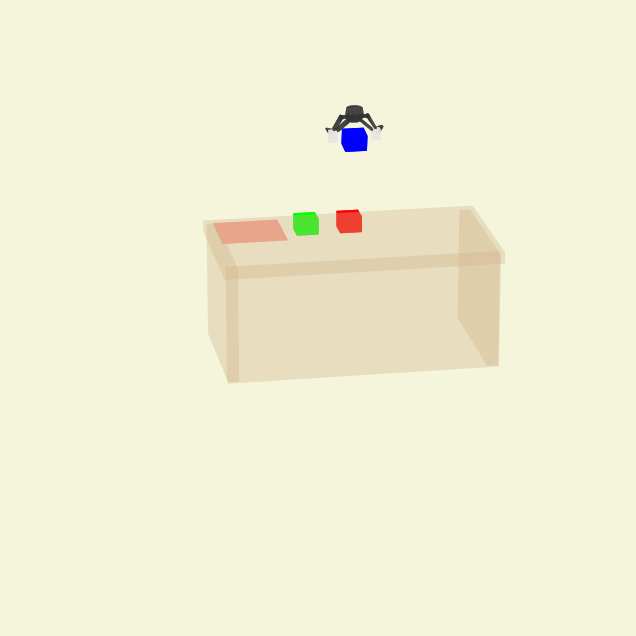

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box',
              {'on': Object(name=tray_red, pos=[ 0.7   -0.6    0.805])}),
             ('tray_red',
              {'static': True,
               'support': [Object(name=C_box, pos=[ 0.55154883 -0.45110345  0.856     ])]}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.85829998]),
                           Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************



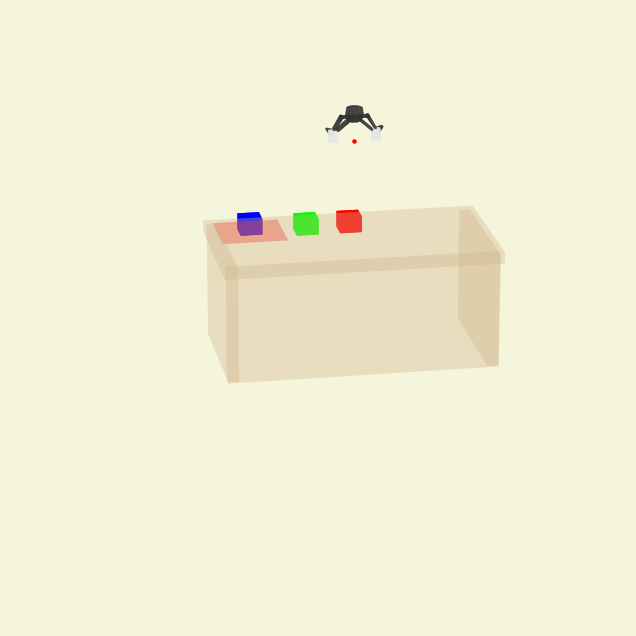

In [13]:
from pytamp.benchmark import Benchmark1
from pykin.utils import plot_utils as p_utils
from pytamp.action.pick import PickAction
from pytamp.action.place import PlaceAction

benchmark1 = Benchmark1(robot_name="doosan", geom="visual", is_pyplot=True, box_num=3)
pick = PickAction(benchmark1.scene_mngr, n_contacts=0, n_directions=0)
place = PlaceAction(
    benchmark1.scene_mngr, n_samples_held_obj=0, n_samples_support_obj=0
)

pick_actions = list(pick.get_possible_actions_level_1())

for pick_action in pick_actions:
    for pick_scene in pick.get_possible_transitions(
        pick.scene_mngr.scene, action=pick_action
    ):
        place_actions = list(place.get_possible_actions_level_1(pick_scene))
        for place_action in place_actions:
            for place_scene in place.get_possible_transitions(
                scene=pick_scene, action=place_action
            ):
                fig, ax = p_utils.init_3d_figure(name="all possible pick transitions")
                place.scene_mngr.render_gripper(
                    ax, pick_scene, alpha=0.9, only_visible_axis=False
                )
                pick_scene.show_logical_states()
                place.scene_mngr.render_objects(ax, pick_scene)
                place.scene_mngr.show()

                fig, ax = p_utils.init_3d_figure(name="all possible place transitions")
                place.scene_mngr.render_gripper(
                    ax, place_scene, alpha=0.9, only_visible_axis=False
                )
                place_scene.show_logical_states()
                place.scene_mngr.render_objects(ax, place_scene)
                place.scene_mngr.show()


In [21]:
place_action

{'type': 'place',
 'held_obj_name': 'C_box',
 'place_obj_name': 'tray_red',
 'release_poses': [({'release': array([[-0.99144486,  0.        ,  0.13052619,  0.52446464],
           [ 0.        ,  1.        ,  0.        , -0.45110345],
           [-0.13052619,  0.        , -0.99144486,  1.06672481],
           [ 0.        ,  0.        ,  0.        ,  1.        ]]),
    'pre_release': array([[-0.99144486,  0.        ,  0.13052619,  0.52446464],
           [ 0.        ,  1.        ,  0.        , -0.45110345],
           [-0.13052619,  0.        , -0.99144486,  1.16672481],
           [ 0.        ,  0.        ,  0.        ,  1.        ]]),
    'post_release': array([[-0.99144486,  0.        ,  0.13052619,  0.51141203],
           [ 0.        ,  1.        ,  0.        , -0.45110345],
           [-0.13052619,  0.        , -0.99144486,  1.16586929],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])},
   array([[ 1.        ,  0.        ,  0.        ,  0.55154883],
          [ 0.

In [15]:
place_scene.objs['C_box'].h_mat

array([[ 1.        ,  0.        ,  0.        ,  0.55154883],
       [ 0.        ,  1.        ,  0.        , -0.45110345],
       [ 0.        ,  0.        ,  1.        ,  0.856     ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])